In [89]:
import pandas as pd
import matplotlib.pyplot as plt
#Leer datos del excel
df = pd.read_excel('clientes.xlsx')
df.head()

,ID,Nombre completo,Fecha de nacimiento,Dirección,Localidad y Código postal,Teléfono,Correo electrónico,Fecha de alta,Grupo de clientes
0,C0001,Leandra Anna Malo Alba,1984-12-08,7943 S. Fifth Street,"Bergenfield, NJ 07621",(598) 451-5865,uraeus@mac.com,2012-01-19 14:32:31,A
1,C0002,Severo Granados Iglesia,1986-08-12,77 Lyme Street,"Hermitage, TN 37076",(869) 771-1487,bhima@me.com,2005-03-22 15:42:12,E
2,C0003,Lucho Andreu Amat,1990-04-16,9448 Fairfield St.,"Aberdeen, SD 57401",(246) 245-7306,psichel@sbcglobal.net,2007-09-15 03:01:11,E
3,C0004,Matías Mauricio Castillo Barrera,1996-12-02,8143 College St.,"Trussville, AL 35173",(707) 933-2513,tbeck@optonline.net,2011-12-07 15:22:50,E
4,C0005,Mauricio Guijarro Castelló,1984-05-14,9893 W. Vale Ave.,"Billings, MT 59101",(612) 325-0216,eegsa@yahoo.ca,2008-06-28 06:58:06,D


In [92]:
#Dar formato correcto a los campos de fecha
df['Fecha de nacimiento'] = pd.to_datetime(df['Fecha de nacimiento'], errors='coerce')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], errors='coerce')

,ID,Nombre completo,Fecha de nacimiento,Dirección,Localidad y Código postal,Teléfono,Correo electrónico,Fecha de alta,Grupo de clientes,Edad
0,C0001,Leandra Anna Malo Alba,1984-12-08,7943 S. Fifth Street,"Bergenfield, NJ 07621",(598) 451-5865,uraeus@mac.com,2012-01-19 14:32:31,A,39
1,C0002,Severo Granados Iglesia,1986-08-12,77 Lyme Street,"Hermitage, TN 37076",(869) 771-1487,bhima@me.com,2005-03-22 15:42:12,E,38
2,C0003,Lucho Andreu Amat,1990-04-16,9448 Fairfield St.,"Aberdeen, SD 57401",(246) 245-7306,psichel@sbcglobal.net,2007-09-15 03:01:11,E,34
3,C0004,Matías Mauricio Castillo Barrera,1996-12-02,8143 College St.,"Trussville, AL 35173",(707) 933-2513,tbeck@optonline.net,2011-12-07 15:22:50,E,27
4,C0005,Mauricio Guijarro Castelló,1984-05-14,9893 W. Vale Ave.,"Billings, MT 59101",(612) 325-0216,eegsa@yahoo.ca,2008-06-28 06:58:06,D,40


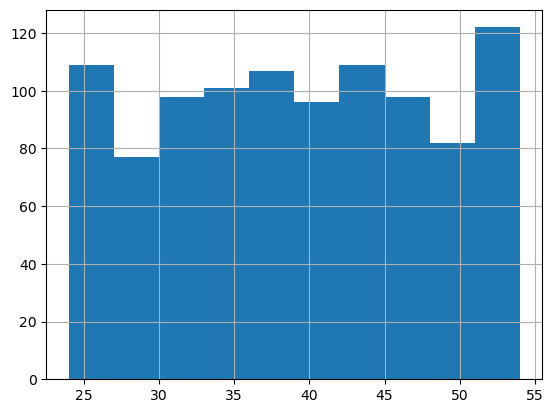

In [93]:
#Calcular edad y añadir campo 
df['Edad'] = (pd.to_datetime('today') - df['Fecha de nacimiento']).dt.days // 365
df['Edad'].hist()
df.head()

<Axes: >

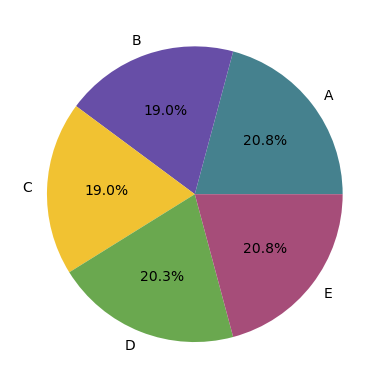

In [94]:
#Analisis por grupo de clientes
colores = ['#45818e','#674ea7','#f1c232','#6aa84f','#a64d79']
df.groupby('Grupo de clientes').size().plot(kind='pie', autopct='%1.1f%%', colors=colores)

<Axes: xlabel='Fecha de alta'>

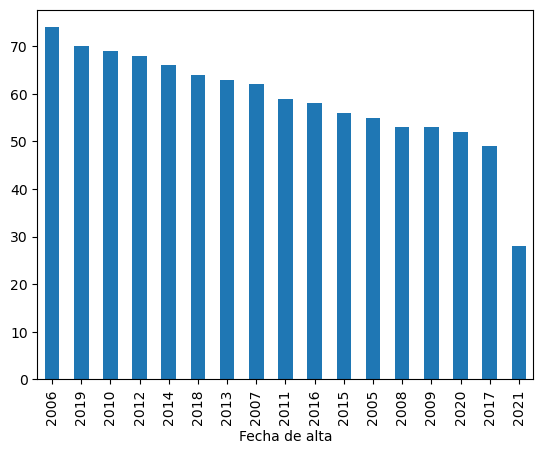

In [95]:
#Analisis según fecha de alta
df['Fecha de alta'].dt.year.value_counts().plot(kind='bar')

In [145]:
# Obtener las 10 localidades más frecuentes
top_localidades = df['Localidad y Código postal'].value_counts().head(10)
# Convertir a DataFrame para aplicar estilos
top_localidades_df = top_localidades.reset_index()
top_localidades_df.columns = ['Localidad y Código postal', 'Frecuencia']
# Aplicar estilo
styled_df = (top_localidades_df.style
             .background_gradient()
             .set_caption('Top 10 Localidades y Códigos Postales')
             .map(lambda x: 'background-color: rgba(33, 141, 95, 0.4)'))
styled_df

,Localidad y Código postal,Frecuencia
0,London,94
1,"Poughkeepsie, NY 12601",3
2,"Rego Park, NY 11374",3
3,"Troy, NY 12180",2
4,"Brooklyn, NY 11229",2
5,"Brooklyn, NY 11209",2
6,"New York, NY 10025",2
7,"Massapequa, NY 11758",2
8,"Brooklyn, NY 11223",2
9,"Bronx, NY 10458",2


In [161]:
#Clientes recientes según feha de alta
clientes_recientes = df[df['Fecha de alta'] > pd.to_datetime('today') - pd.DateOffset(years=4)].head()
styled_recent_df = clientes_recientes.reset_index()
styled_recent_df = (styled_recent_df.style
             .set_caption('Clientes recientes')
             .map(lambda x: 'background-color: rgba(230, 214, 20, 0.5)'))
styled_recent_df

,index,ID,Nombre completo,Fecha de nacimiento,Dirección,Localidad y Código postal,Teléfono,Correo electrónico,Fecha de alta,Grupo de clientes,Edad
0,36,C0037,Gracia Goicoechea Alba,1980-12-10 00:00:00,257 Pheasant Drive,"Hialeah, FL 33010",(685) 726-6159,slanglois@hotmail.com,2021-03-23 13:49:08,E,43
1,41,C0042,Encarnacion Español Ocaña,1985-03-25 00:00:00,MK9 3EN,21 Mill Road,(953) 901-9132,smartfart@aol.com,2020-11-06 06:49:18,C,39
2,54,C0055,María Carmen de Fuster,1973-08-28 00:00:00,WAKEFIELD,WF81 5TB,(663) 750-6940,staffelb@aol.com,2020-10-22 18:37:06,E,51
3,78,C0079,Emperatriz Sabina Pastor Pedrero,1974-02-03 00:00:00,SHEFFIELD,S39 0KU,(504) 719-6268,ilikered@mac.com,2020-12-20 10:46:17,B,50
4,97,C0098,Fortunata Pascual Ribas,1988-01-06 00:00:00,304 Springfield Road,BRADFORD,(435) 239-5138,hoyer@hotmail.com,2021-03-03 02:21:44,A,36


In [162]:
#Exportar a .csv
df.to_csv('clientes_limpios.csv', index=False)

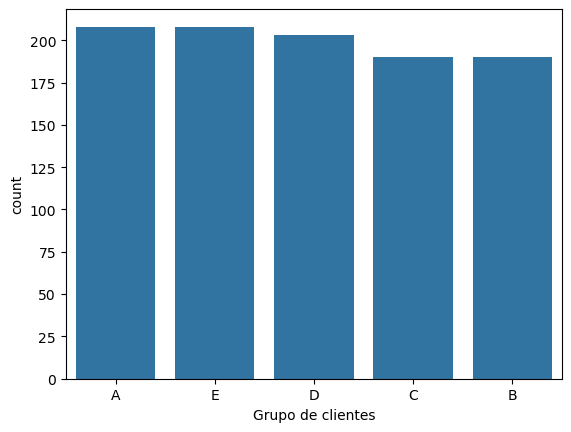

In [164]:
#Visualización con seaborn y matplotlib
import seaborn as sns

sns.countplot(x='Grupo de clientes', data=df)
plt.show()

In [179]:
#Segmentación por edad
def segmentar_cliente(edad):
    if edad < 30:
        return 'Joven'
    elif 30 <= edad < 60:
        return 'Adulto'
    else:
        return 'Mayor'

df['Segmento'] = df['Edad'].apply(segmentar_cliente)
df.head(10)

,ID,Nombre completo,Fecha de nacimiento,Dirección,Localidad y Código postal,Teléfono,Correo electrónico,Fecha de alta,Grupo de clientes,Edad,Segmento
0,C0001,Leandra Anna Malo Alba,1984-12-08,7943 S. Fifth Street,"Bergenfield, NJ 07621",(598) 451-5865,uraeus@mac.com,2012-01-19 14:32:31,A,39,Adulto
1,C0002,Severo Granados Iglesia,1986-08-12,77 Lyme Street,"Hermitage, TN 37076",(869) 771-1487,bhima@me.com,2005-03-22 15:42:12,E,38,Adulto
2,C0003,Lucho Andreu Amat,1990-04-16,9448 Fairfield St.,"Aberdeen, SD 57401",(246) 245-7306,psichel@sbcglobal.net,2007-09-15 03:01:11,E,34,Adulto
3,C0004,Matías Mauricio Castillo Barrera,1996-12-02,8143 College St.,"Trussville, AL 35173",(707) 933-2513,tbeck@optonline.net,2011-12-07 15:22:50,E,27,Joven
4,C0005,Mauricio Guijarro Castelló,1984-05-14,9893 W. Vale Ave.,"Billings, MT 59101",(612) 325-0216,eegsa@yahoo.ca,2008-06-28 06:58:06,D,40,Adulto
5,C0006,Isaura Leyre Avilés Pelayo,1987-04-18,8094 Albany Drive,"Poughkeepsie, NY 12601",(992) 564-5230,barlow@verizon.net,2008-04-26 20:18:11,E,37,Adulto
6,C0007,Soraya Morera-Lago,1990-11-27,9001 Creek Street,"Lawrence, MA 01841",(651) 544-1246,wkrebs@me.com,2019-10-08 16:04:43,A,33,Adulto
7,C0008,Victoriano Tapia-Cabanillas,1981-03-06,57 Green Drive,"Fair Lawn, NJ 07410",(851) 782-6044,dleconte@outlook.com,2009-08-16 08:37:17,C,43,Adulto
8,C0009,Nidia Saez Campoy,1980-04-28,86 Surrey St.,"Kennewick, WA 99337",(265) 609-6654,flakeg@verizon.net,2013-01-05 21:49:51,B,44,Adulto
9,C0010,Teófila Villanueva Molina,1987-01-04,8728 Boston Street,"Rego Park, NY 11374",(305) 491-4988,slaff@icloud.com,2007-12-29 03:29:10,E,37,Adulto
